In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

In [3]:
# !pip install yfinance

In [4]:
# import cvxopt as opt
# from cvxopt import blas, solvers

In [8]:
assets_sel = pd.read_csv('f:\Projects\Robo_Advisor\my_application_robo\ML\data_for_robo.csv',)

In [10]:
assets_sel['Date']

0       2013-12-31
1       2014-01-02
2       2014-01-03
3       2014-01-06
4       2014-01-07
           ...    
1506    2019-12-24
1507    2019-12-26
1508    2019-12-27
1509    2019-12-30
1510    2019-12-31
Name: Date, Length: 1511, dtype: object

In [69]:
data = yf.download("VTI VEA VWO MUB BNDX EMB VDE VNQ VHT", start="2014-01-01", end="2020-01-01")

[*********************100%***********************]  9 of 9 completed


In [70]:
df=data['Adj Close']

In [71]:
df.to_csv('data_for_robo.csv')

In [67]:
assets_selected = pd.read_csv('data_for_robo_ot.csv',index_col='Date')

In [74]:
return_vec = np.array(assets_selected.pct_change().dropna(axis=0)).T
n = len(return_vec)
returns = np.asmatrix(return_vec)
mus = 0.

# Convert to cvxopt matrices
S = opt.matrix(np.cov(return_vec))
pbar = opt.matrix(np.mean(return_vec, axis=1))
# Create constraint matrices
G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
h = opt.matrix(0.0, (n ,1))
A = opt.matrix(1.0, (1, n))
b = opt.matrix(1.0)
# Calculate efficient frontier weights using quadratic programming
portfolios = solvers.qp(mus*S, -pbar, G, h, A, b)
w=portfolios['x'].T
print (w)
Alloc =  pd.DataFrame(data = np.array(portfolios['x']),index = assets_selected.columns)
Alloc


     pcost       dcost       gap    pres   dres
 0: -3.1639e-04 -1.0005e+00  1e+00  0e+00  3e+00
 1: -3.1641e-04 -1.0451e-02  1e-02  7e-17  3e-02
 2: -3.1880e-04 -5.5110e-04  2e-04  8e-17  6e-04
 3: -4.1330e-04 -4.5075e-04  4e-05  1e-16  5e-05
 4: -4.4453e-04 -4.4832e-04  4e-06  2e-16  7e-20
 5: -4.4659e-04 -4.4678e-04  2e-07  3e-16  8e-20
 6: -4.4675e-04 -4.4676e-04  4e-09  1e-16  1e-19
Optimal solution found.
[ 1.50e-06  5.17e-07  6.21e-04  9.99e-01  5.54e-07]



,0
BDN,1.500397e-06
VEA,5.174600e-07
VNQ,6.205813e-04
VTI,9.993768e-01
VWO,5.538655e-07


In [35]:
# # Calculate efficient frontier weights using quadratic programming
# portfolios = solvers.qp(mus*S, -pbar, G, h, A, b)
# returns_final=(np.array(assets_selected) * np.array(w))
# returns_sum = np.sum(returns_final,axis =1)
# returns_sum_pd = pd.DataFrame(returns_sum, index = assets.index )
# returns_sum_pd = returns_sum_pd - returns_sum_pd.iloc[0,:] + 10000   

     pcost       dcost       gap    pres   dres
 0: -2.3805e-04 -1.0005e+00  1e+00  1e-16  4e+00
 1: -2.3808e-04 -1.0450e-02  1e-02  5e-17  4e-02
 2: -2.4108e-04 -5.5033e-04  3e-04  4e-17  1e-03
 3: -3.8160e-04 -4.4799e-04  7e-05  6e-17  3e-19
 4: -4.3442e-04 -4.4996e-04  2e-05  2e-16  2e-19
 5: -4.4493e-04 -4.4510e-04  2e-07  1e-16  2e-19
 6: -4.4504e-04 -4.4504e-04  2e-09  1e-16  2e-19
Optimal solution found.


In [57]:
returns_sum_pd

,0
0,10000.000000
1,9999.260950
2,9999.243365
3,9999.023402
4,9999.560090
...,...
1506,10076.841134
1507,10077.620458
1508,10077.472494
1509,10076.594508


In [ ]:
# # Below code calculates covariance matrix
# # pct_change() function calculates the percentage change between the 
# # current and a prior element and then cov() calculates Covariance.

# ################### For Portfolio  ######################
# cov_matrix_l = assets_selected.pct_change().apply(lambda x: np.log(1+x)).cov()

# ######################################################################
#                         # Mean Return Calculation
# ######################################################################

# # Below code calculates mean Return of stocks annually.
# # Here we can use two methods to calculate it:
# # 1) We take stock price of last day of each year and then use percentage
# #    change and thereafter take mean or geometric mean of it.
# # OR
# # 2) We take percentage change for daily stock price over stipulated years
# #    and then take mean of it and multiply it by 250 to reflect annual
# #    value

# # resample('Y').last() fetches the last data of each year in the given 
# # timeseries
# # pct_change() will take percentage of change current and previous entry
# # mean() will give the average percentage of change in data 

# ################### For Portfolio ######################
# exp_ret_port1 = assets_selected.resample('Y').last().pct_change().mean()

# ######################################################################
#                     # Standard Deviation Calculation
# ######################################################################

# # Below code calculates the Vol/standard deviation/Risk of stocks annually
# # Here we are taking percentage change of daily stock price and then
# # performing log transfomation before taking it's standard deviation
# # and then multiplying it with sqrt of 250 to reflect it into yearly value

# ################### For Portfolio ######################
# sd_l = assets_selected.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)) 

# ######################################################################
#                     # Joining Returns and Volatility
# ######################################################################

# # Below code joins together the Returns and Volatility together for each
# # stock for both portfolios

# ################### For Portfolio 1 (Large Cap) ######################
# assets_l = pd.concat([exp_ret_port1, sd_l], axis=1)
# assets_l.columns = ['Returns', 'Volatility']

# ######################################################################
#                     # Random Portfolio Creations
# ######################################################################

# # Below code creates 1000 portfolios using random weights for each stock
# # tickers, for each weight combination it calculates weighted Return and
# # Standard Deviation/Risk which is later used to plot scatter plot for
# # both portfolios to get efficient frontier

# # Defining number of random portfolios to be created
# num_portfolios = 1000

# ################### For Portfolio 1 (Large Cap) ######################
# # Defining empty lists to append Return, Volatility and Weights
# port1_ret      = []
# port1_vola     = []
# port1_weights  = []
# num_assets_l = len(assets_selected.columns)

# # Below code loops around number of portfolios and performs calculations
# for portfolio in range(num_portfolios):
#     # takes random values of weights between 0 and 1
#     weights = np.random.random(num_assets_l)
#     # weights are converted in values such that the addition of all weights become 1
#     weights = weights/np.sum(weights)
#     # weights are appended into the list
#     port1_weights.append(weights)
#     # weighted returns are calculated below by taking dot product 
#     returns_l = np.dot(weights, exp_ret_port1)
#     # calculated Returns are appended to list
#     port1_ret.append(returns_l)
#     # Below code calculates weighted variance of stock using Covariance Matrix
#     var_l = cov_matrix_l.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
#     # Calculating Standard Deviation by taking sqrt of variance
#     sd_l_new = np.sqrt(var_l)
#     # Converting Standard Deviation into annual by multiplying it by sqrt of 250
#     ann_sd_l = sd_l_new*np.sqrt(250)
#     # Appending the calculated Volatility to list
#     port1_vola.append(ann_sd_l)

In [2]:
assets_sel = pd.read_csv('data_for_robo_2.csv',parse_dates=[0],index_col=0)

In [3]:
assets_sel.head()

,BNDX,EMB,MUB,VDE,VEA,VHT,VNQ,VTI,VWO,VXUS
Date,,,,,,,,,,
2013-12-31,42.800793,78.013474,87.707314,101.597275,33.862999,91.651390,48.312561,84.050987,34.060078,42.808529
2014-01-02,42.818062,78.027908,87.986351,100.142784,33.294289,91.180008,48.320042,83.314926,32.867905,42.056637
2014-01-03,42.783569,78.099998,87.994759,99.901703,33.302410,91.388504,48.589455,83.297424,32.826504,42.040291
2014-01-06,42.887089,78.410202,88.045486,99.877602,33.237415,91.016838,48.836407,83.078346,32.511898,41.917706
2014-01-07,42.990601,78.511116,88.197670,100.657066,33.432404,92.077477,49.053429,83.612869,32.644356,42.122028


In [4]:
riskTolerance = 0.3
if 0 <= riskTolerance < 0.2:
    stocks = 0.20
    bonds  = 0.55
    other  = 0.25
elif 0.2 <= riskTolerance < 0.4:
    stocks = 0.40
    bonds  = 0.50
    other  = 0.10 
elif 0.4 <= riskTolerance < 0.6:
    stocks = 0.60
    bonds  = 0.35
    other  = 0.05
elif 0.6 <= riskTolerance < 0.8:
    stocks = 0.70
    bonds  = 0.25
    other  = 0.05  
else:
    stocks = 0.80
    bonds  = 0.15
    other  = 0.05   

In [5]:
 exp_ret = assets_sel.resample('Y').last().pct_change().dropna()

In [6]:
exp_ret.mean()

BNDX    0.046030
EMB     0.061061
MUB     0.041328
VDE    -0.028531
VEA     0.050983
VHT     0.133531
VNQ     0.115313
VTI     0.120616
VWO     0.056309
VXUS    0.051047
dtype: float64

In [7]:
# returns_new = np.log(assets_sel/assets_sel.shift(1))
# returns_new.mean()

In [8]:
# # Getting the risk free rate below
# stocks_rf = yf.download(['^TNX'],  start="2014-01-01", end="2020-01-01")
# rf = stocks_rf["Adj Close"].pct_change().mean()

In [9]:
import scipy.optimize as optimize

In [10]:
# for sharpe ratio based
def port_alloc(type,asset_list):

    returns = exp_ret[asset_list]

    def portfolio_stats(weights):
        # Convert to array in case list was passed instead.
        weights = np.array(weights)
        port_return = np.sum(returns.mean() * weights) * 252
        port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
        sharpe = (port_return)/port_vol
        return {'return': port_return, 'volatility': port_vol, 'sharpe': sharpe}

    def minimize_sharpe(weights):  
        return -portfolio_stats(weights)['sharpe'] 

    # def minimize_volatility(weights):  
    #     # Note that we don't return the negative of volatility here because we 
    #     # want the absolute value of volatility to shrink, unlike sharpe.
    #     return portfolio_stats(weights)['volatility'] 

    constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) - type})
    num_assets = len(asset_list)
    bounds = tuple((0,type) for x in range(num_assets))
    initializer = num_assets * [1./num_assets,]

    optimal_sharpe=optimize.minimize(minimize_sharpe,
                                    initializer,
                                    method = 'SLSQP',
                                    bounds = bounds,
                                    constraints = constraints)

    optimal_sharpe_weights=optimal_sharpe['x'].round(4)
    return list(zip(asset_list,list(optimal_sharpe_weights)))


In [11]:
#for minimum variance portfolio based
def port_alloc(type,asset_list):

    val = assets_sel[asset_list]

    def portfolio_stats(weights):
        # Convert to array in case list was passed instead.
        weights = np.array(weights)
        cov_matrix = val.pct_change().apply(lambda x: np.log(1+x)).cov()
        min_var = np.sqrt(cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum())*np.sqrt(252)
        return min_var

    def minimize_variance(weights):  
        return portfolio_stats(weights)

    constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) - type})
    num_assets = len(asset_list)
    bounds = tuple((0,type) for x in range(num_assets))
    initializer = num_assets * [1./num_assets,]

    min_variance=optimize.minimize(minimize_variance,
                                    initializer,
                                    method = 'SLSQP',
                                    bounds = bounds,
                                    constraints = constraints)

    min_variance_weights=min_variance['x'].round(4)
    return list(zip(asset_list,list(min_variance_weights)))


In [12]:
# def port_alloc(type,asset_list):

#     returns = exp_ret[asset_list]
#     cov_matrix = returns.pct_change().apply(lambda x: np.log(1+x)).cov()

#     ################### For Portfolio 1 (Large Cap) ###################### 
   
#     # bounding the weights between 0 and 1 so that there is no weight above 1
#     num_assets = len(asset_list)
#     bounds = tuple((0,type) for x in range(num_assets))
#     initializer = num_assets * [1./num_assets,]

#     # min var optimization - in this we are generating the weights which would
#     # lead to minimum variance for combined stocks of Portfolio 1
#     # Same function is applied to get the weights for minimum variance portfolio
#     # of Portfolio 2
#     def calculate_portfolio_var(weights,cov_matrix):
#         return np.sqrt(cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum())*np.sqrt(252)
    
#     # Contraining the weights such that sum of all weights should be max 1.0
#     cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x)-type})
#     # Using minimize function to minimize the Variance and based on the
#     # given restriction of weights assigned to stocks
#     res_l= optimize.minimize(calculate_portfolio_var, initializer, args=cov_matrix, 
#                     method='SLSQP',constraints=cons,bounds=bounds)
    
#     # Extracting weights for Minimum Variance Portfolio 1
#     min_weights_l = res_l.x

#     return min_weights_l


In [13]:
stock_weights = port_alloc(type=stocks,asset_list=['VTI','VEA','VWO'])
stock_weights = pd.DataFrame(stock_weights)

In [14]:
bond_weights  = port_alloc(type=bonds,asset_list=['EMB','BNDX','MUB'])
bond_weights  = pd.DataFrame(bond_weights)

In [15]:
other_weights = port_alloc(type=other,asset_list=['VDE','VNQ','VHT'])
other_weights = pd.DataFrame(other_weights)

In [16]:
final = stock_weights.append(bond_weights.append(other_weights))
final = final.set_index(0)

In [17]:
# Alloc =  pd.DataFrame(data = np.array(portfolios['x']), index = assets_selected.columns)

In [18]:
abc=final.to_dict()

In [20]:
abc

{1: {'VTI': 0.2565,
  'VEA': 0.1435,
  'VWO': 0.0,
  'EMB': 0.0238,
  'BNDX': 0.2301,
  'MUB': 0.2461,
  'VDE': 0.0101,
  'VNQ': 0.0546,
  'VHT': 0.0352}}

In [59]:
port_allocation[1]['VDE']

In [60]:
data = {'Portfolio' : 'ETF distribution', 'Stocks' : 11, 'Eat' : 2, 'Commute' : 2, 'Watching TV' : 2, 'Sleeping' : 7}

In [87]:
time_dict = {1 : '0-5 years',
                            2 : '6-10 years',
                                3 : '11-20 years',
                                    4 : '21+ years'}

In [89]:
        
time_span  = time_dict[1]
time_span

'0-5 years'

In [63]:
# create a dictionary
dic = {'BNDX': 'Vanguard Total International Bond ETF',
        'EMB': 'iShares J.P. Morgan USD Emerging Markets Bond ETF',
        'MUB': 'iShares National Muni Bond ETF',
        'VDE': 'Vanguard Energy Index Fund ETF',
        'VEA': 'Vanguard FTSE Developed Markets Index Fund ETF',
        'VHT': 'Vanguard Health Care Index Fund ETF',
        'VNQ': 'Vanguard Real Estate Index Fund ETF',
        'VTI': 'Vanguard Total Stock Market Index Fund ETF',
        'VWO': 'Vanguard FTSE Emerging Markets Index Fund ETF'}

In [77]:
x=pd.DataFrame(abc).reset_index()
x.columns = ['ETFs','Percentage']
etf_name = x["ETFs"].map(dic)
x.insert(loc=1, column='ETF Name', value=etf_name)
x['Amount'] = round(x['Percentage']*5000,2)
x['Percentage'] = x['Percentage'].apply(lambda x: str(round(100*x,2))+' %')
x

,ETFs,ETF Name,Percentage,Amount
0,BNDX,Vanguard Total International Bond ETF,23.01 %,1150.5
1,EMB,iShares J.P. Morgan USD Emerging Markets Bond ETF,2.38 %,119.0
2,MUB,iShares National Muni Bond ETF,24.61 %,1230.5
3,VDE,Vanguard Energy Index Fund ETF,1.01 %,50.5
4,VEA,Vanguard FTSE Developed Markets Index Fund ETF,14.35 %,717.5
5,VHT,Vanguard Health Care Index Fund ETF,3.52 %,176.0
6,VNQ,Vanguard Real Estate Index Fund ETF,5.46 %,273.0
7,VTI,Vanguard Total Stock Market Index Fund ETF,25.65 %,1282.5
8,VWO,Vanguard FTSE Emerging Markets Index Fund ETF,0.0 %,0.0


In [54]:
a["B"] = a["index"].map(dic)

In [72]:
for m in x:
    print(m)

ETFs
ETF Name
Percentage
Amount


In [85]:
x[x['ETFs']=='VDE']

,ETFs,ETF Name,Percentage,Amount
3,VDE,Vanguard Energy Index Fund ETF,1.01 %,50.5


BNDX
EMB
MUB
VDE
VEA
VHT
VNQ
VTI
VWO


In [81]:
x.loc[~(x['Amount']<1),:]

,ETFs,ETF Name,Percentage,Amount
0,BNDX,Vanguard Total International Bond ETF,23.01 %,1150.5
1,EMB,iShares J.P. Morgan USD Emerging Markets Bond ETF,2.38 %,119.0
2,MUB,iShares National Muni Bond ETF,24.61 %,1230.5
3,VDE,Vanguard Energy Index Fund ETF,1.01 %,50.5
4,VEA,Vanguard FTSE Developed Markets Index Fund ETF,14.35 %,717.5
5,VHT,Vanguard Health Care Index Fund ETF,3.52 %,176.0
6,VNQ,Vanguard Real Estate Index Fund ETF,5.46 %,273.0
7,VTI,Vanguard Total Stock Market Index Fund ETF,25.65 %,1282.5


In [ ]:
data = {'Stocks' : 'Hours per Day', 'Work' : 11, 'Eat' : 2, 'Commute' : 2, 'Watching TV' : 2, 'Sleeping' : 7}

# Monte Carlo simulation

In [152]:
# assets_sel = pd.read_csv('data_for_robo_2.csv',parse_dates=[0],index_col=0)

In [153]:
abc[1]

{'VTI': 0.2565,
 'VEA': 0.1435,
 'VWO': 0.0,
 'EMB': 0.0238,
 'BNDX': 0.2301,
 'MUB': 0.2461,
 'VDE': 0.0101,
 'VNQ': 0.0546,
 'VHT': 0.0352}

In [154]:
col_list=list(abc[1].keys())

In [156]:
# 'assets_sel.columns

In [157]:
df=assets_sel.filter(items=col_list)

In [158]:
final_st=df.assign(**abc[1]).mul(df).sum(1)

In [159]:
log_return=np.log(1+final_st.pct_change())

In [160]:
#Calculate the Drift
u = log_return.mean()
var = log_return.var()
drift = u - (0.5*var)

#Calculate standard deviation of returns
stddev = log_return.std()

In [161]:
time_monte = {1 : 1260,
                2 : 2520,
                    3 : 5040,
                        4 : 5292}

In [162]:
time_monte[1]

1260

In [163]:
from scipy.stats import norm

In [182]:
daily_returns = np.exp(drift + stddev * norm.ppf(np.random.rand(time_monte[1],50)))

In [183]:
daily_returns

array([[1.00267256, 1.0014118 , 0.99456847, ..., 1.00680526, 0.99116948,
        0.99906475],
       [1.0026992 , 0.99718175, 1.00262153, ..., 1.00499015, 1.00540421,
        0.99588121],
       [1.00729827, 1.00276864, 1.00419345, ..., 0.99963117, 0.99205068,
        0.99709122],
       ...,
       [0.99715294, 0.99724448, 1.00290888, ..., 1.00239291, 1.00393756,
        0.99085344],
       [0.99802351, 1.00362627, 1.00363001, ..., 0.99810946, 0.99995964,
        0.99620106],
       [1.00830329, 1.00038879, 1.00010649, ..., 1.00075498, 0.99935439,
        1.0013148 ]])

In [184]:
# Create matrix with same size as daily returns matrix
price_list = np.zeros_like(daily_returns)

# Introduce the last known price for the stock in the first item of every iteration - ie Day 0  for every trial in the simulation
price_list[0] = final_st.iloc[-1]

In [185]:
for t in range(1,time_monte[1]):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline  

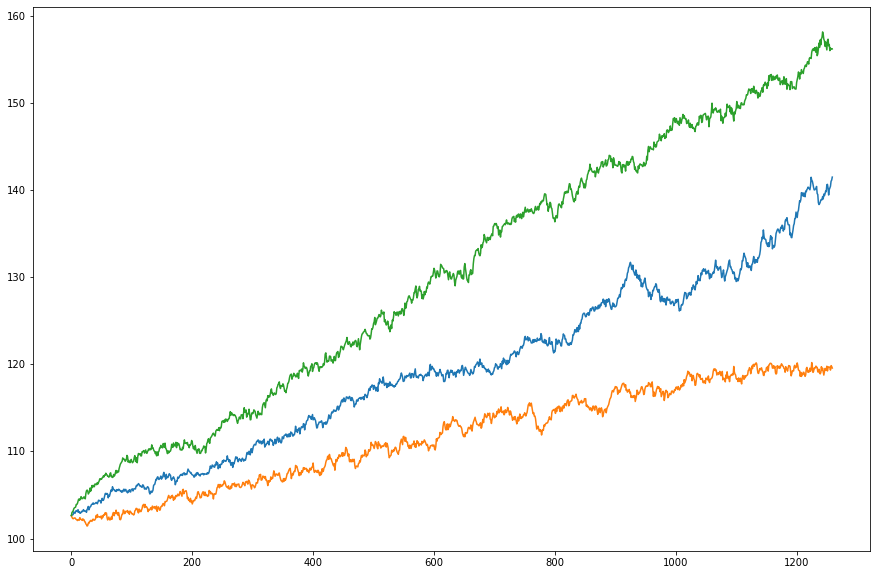

In [187]:
plt.figure(figsize=(15,10))
plt.plot(np.median(price_list,axis=1))
plt.plot(np.percentile(price_list,25,axis=1))
plt.plot(np.percentile(price_list,75,axis=1))
plt.show()

In [180]:
price_list.shape

(1260, 100)

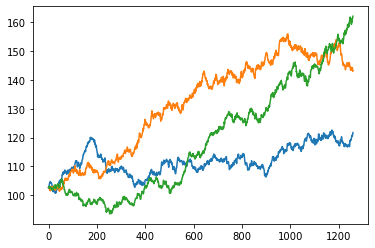

In [181]:
plt.plot(price_list[:,np.argwhere(price_list[-1]==np.percentile(price_list[-1],15,interpolation='nearest'))[0][0]])
plt.plot(price_list[:,np.argwhere(price_list[-1]==np.percentile(price_list[-1],50,interpolation='nearest'))[0][0]])
plt.plot(price_list[:,np.argwhere(price_list[-1]==np.percentile(price_list[-1],75,interpolation='nearest'))[0][0]])

In [189]:
len(final_st)/252

5.996031746031746